# Data Wandering

Sometimes to make sense, we need to wander around.

_Created: 2023-04-20_

_Modified: 2023-04-28_

In [1]:
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


def timestamped_text(x: pd.Series) -> str:
    "Take a series or dict and preprend the timestamp to the text."
    lean_text = ' '.join(x['text'].split())
    return f'<{x["start"]:.2f},{x["end"]:.2f}> {lean_text}'


dialog_dir = Path.cwd() / '..' / 'data' / 'diarized-recaps-csv'
dialogs_multiple_speakers, dialogs_len, dialogs_csv = [], [], []
longest_dialog = 0
verbose = False
for i, dialog_csv in enumerate(dialog_dir.iterdir()):
    dialogs_csv.append(dialog_csv.name)
    if verbose and i % 300 == 0:
        print(dialog_csv)
    # open csv with pandas
    dialog_df = pd.read_csv(dialog_csv)
    if verbose and i % 1000 == 0:
        display(dialog_df.head(), dialog_df.tail())
    # merge all the rows in the column "text" of `dialog_df`
    if len(dialog_df['speaker'].unique()) > 1:
        dialogs_multiple_speakers.append(dialog_csv.name)
        if verbose:
            print('WARNING: more than one speaker in this dialog')
    # apply the function to each row of the dataframe
    dialog_df['timestamped_text'] = dialog_df.apply(timestamped_text, axis=1)
    dialog_text = dialog_df['timestamped_text'].str.cat(sep=' ')
    dialogs_len.append(len(dialog_text))
    if len(dialog_text) > longest_dialog:
        longest_dialog = len(dialog_text)
        longest_dialog_name = dialog_csv.name

print(f'The longest dialog: {longest_dialog_name} is {longest_dialog} characters long.')

The longest dialog: PyGEjVN3rro.csv is 167641 characters long.


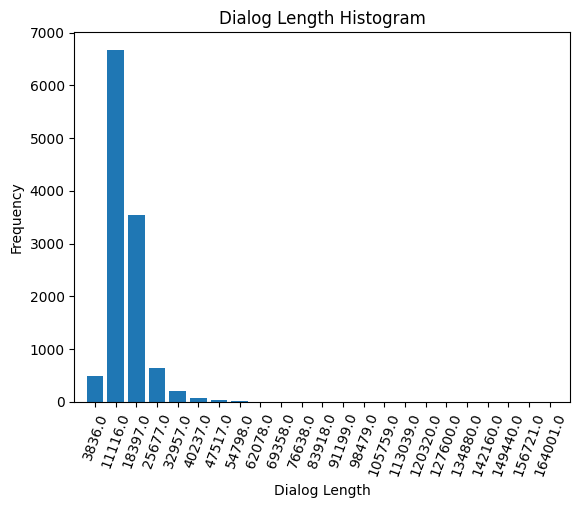

In [2]:
hist, bin_edges = np.histogram(dialogs_len, bins='doane')
# hist, bin_edges = np.histogram(dialogs_len, bins=100)
ticks_slice = slice(0, len(hist), int(len(hist) * 0.05))

x = np.arange(len(hist))
center_bin = np.round(0.5 * (bin_edges[:-1] + bin_edges[1:]))
plt.bar(x, hist, width=0.8)
ax = plt.gca()
ax.set_xticks(x[ticks_slice])
ax.set_xticklabels(center_bin[ticks_slice], rotation=70)
ax.set_xlim(-1, len(hist))
plt.title("Dialog Length Histogram")
plt.xlabel("Dialog Length")
plt.ylabel("Frequency")
plt.show()

In [3]:
mean_dialog_len = np.mean(dialogs_len)
ind = np.abs(dialogs_len - mean_dialog_len).argmin()
print(f'The mean dialog length is: {mean_dialog_len}')
print(f'The dialog with the closest length to the mean is: {dialogs_csv[ind]}')

The mean dialog length is: 15013.519549257298
The dialog with the closest length to the mean is: 1EuwzHn9JEM.csv
